In [1]:
import lbg_forecast.modified_redshift as mz
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import numpy as np

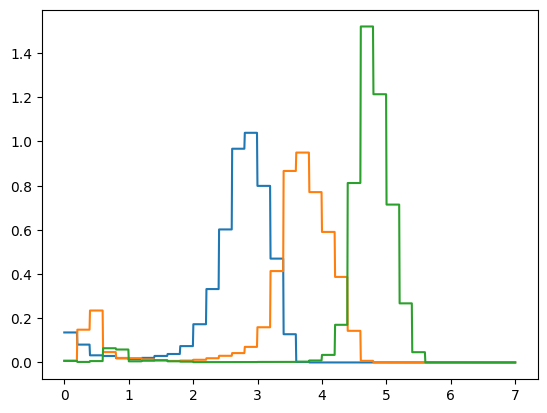

In [2]:
u = mz.u_dropout(jnp.array([0]*30))
g = mz.g_dropout(jnp.array([0]*30))
r = mz.r_dropout(jnp.array([0]*30))

plt.plot(jnp.linspace(0, 7, 1000), u.pz_fn(jnp.linspace(0, 7, 1000)))
plt.plot(jnp.linspace(0, 7, 1000), g.pz_fn(jnp.linspace(0, 7, 1000)))
plt.plot(jnp.linspace(0, 7, 1000), r.pz_fn(jnp.linspace(0, 7, 1000)))

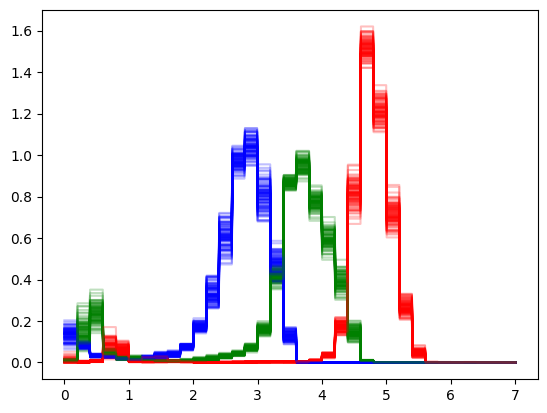

In [3]:
mean_u = jnp.load("./4pca_data/npca_means_u.npy")
cov_u = jnp.load("./4pca_data/npca_cov_u.npy")

mean_g = jnp.load("./4pca_data/npca_means_g.npy")
cov_g = jnp.load("./4pca_data/npca_cov_g.npy")

mean_r = jnp.load("./4pca_data/npca_means_r.npy")
cov_r = jnp.load("./4pca_data/npca_cov_r.npy")

nsamples = 100
for i in range(nsamples):
    u_nz = mz.u_dropout(np.random.multivariate_normal(mean_u, cov_u))
    u_fn = u_nz.pz_fn(jnp.linspace(0, 7, 1000))
    plt.plot(jnp.linspace(0, 7, 1000), u_fn, c='blue', alpha=0.25)

    g_nz = mz.g_dropout(np.random.multivariate_normal(mean_g, cov_g))
    g_fn = g_nz.pz_fn(jnp.linspace(0, 7, 1000))
    plt.plot(jnp.linspace(0, 7, 1000), g_fn, c='green', alpha=0.25)

    r_nz = mz.r_dropout(np.random.multivariate_normal(mean_r, cov_r))
    r_fn = r_nz.pz_fn(jnp.linspace(0, 7, 1000))
    plt.plot(jnp.linspace(0, 7, 1000), r_fn, c='red', alpha=0.25)
    #print(jax.scipy.integrate.trapezoid(u_fn, jnp.linspace(0, 7, 1000)))

Array(0.9922861, dtype=float32)

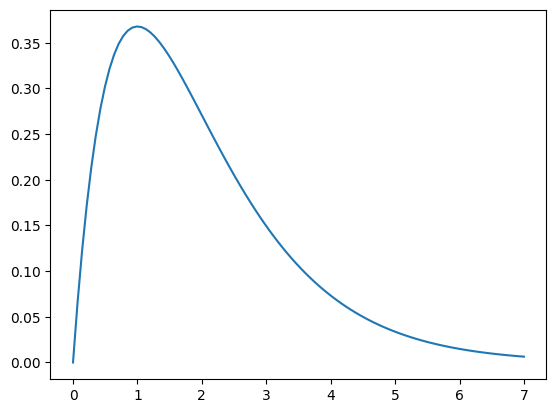

In [4]:
smail_nz = mz.smail_nz(1, 1, 1)
smail_fn = smail_nz.pz_fn(jnp.linspace(0, 7, 100))
plt.plot(jnp.linspace(0, 7, 100), smail_fn)
jax.scipy.integrate.trapezoid(smail_fn, jnp.linspace(0, 7, 100))